# Exercise Sheet 02

In [47]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [48]:
data = np.loadtxt('whDatadat.sec', dtype=object, comments='#', delimiter=None)
w = data[:, 0].astype(float)
h = data[:, 1].astype(float)

In [49]:
# printing the corresponding values of w and h as w: h
print('w: h')
for i in range(len(w)):
    print(w[i], ':', h[i])
    

w: h
-1.0 : 186.0
60.0 : 176.0
45.0 : 158.0
58.0 : 180.0
70.0 : 186.0
70.0 : 168.0
60.0 : 168.0
64.0 : 164.0
68.0 : 178.0
78.0 : 170.0
80.0 : 189.0
78.0 : 195.0
66.0 : 172.0
74.0 : 187.0
84.0 : 180.0
85.0 : 186.0
75.0 : 185.0
60.0 : 168.0
71.0 : 179.0
67.0 : 178.0
88.0 : 183.0
-1.0 : 179.0
70.0 : 170.0
60.0 : 175.0
92.0 : 186.0
53.0 : 159.0
61.0 : 161.0
78.0 : 178.0
100.0 : 175.0
100.0 : 185.0
79.0 : 175.0
62.0 : 162.0
87.0 : 173.0
69.0 : 172.0
61.0 : 177.0
90.0 : 175.0
90.0 : 172.0
80.0 : 177.0
100.0 : 180.0


In [50]:
# removing the outliers
def remove_outliers():
    """
    Returns the data array X without outliers
    """
    data = np.loadtxt('whDatadat.sec', dtype=object, comments='#', delimiter=None)
    w = data[:, 0].astype(float)
    h = data[:, 1].astype(float)   
    max_dev = 2 # most common max deviation from the mean
    mean = np.mean(w) 
    standard_dev = np.std(w) 
    outliers_mask = np.abs((w - mean) / standard_dev) > max_dev 
    X = np.column_stack((h[~outliers_mask],w[~outliers_mask]))
    return X

In [51]:
# Using maximum likelihood parameter estimation to fit Bivariate Gaussian Distribution
def likelihood(X): 
    """
    Returns the maximum likelihood parameters for a given data matrix X
    """
    mean_value = np.mean(X, axis=0) # axis=0 for column-wise mean
    cov_matrix = np.cov(X, rowvar=False)  # Set rowvar=False for variables in columns
    return mean_value,cov_matrix

In [52]:
# Predicting the weight for a given height using the conditional expectation
def pred(X, mean_values, cov_matrix, h):
    """
    Returns the conditional expectation E[w|h] for a given height h 
    and the maximum likelihood parameters mean_values and cov_matrix using the formula:
    E[w|h] = E[w] + cov(hw) * (h - E[h]) / cov(hh)
    """
    # Extracting mean height and weight values
    mean_height = mean_values[0]
    mean_weight = mean_values[1]
    
    # Finding the indices of height and weight in the dataset
    h_index = 0
    w_index = 1
    
    # Calculating conditional expectation E[w|h]
    cov_hw = cov_matrix[h_index][w_index]
    cov_hh = cov_matrix[h_index][h_index]
    
    conditional_expectation = mean_weight + cov_hw * (h - mean_height) / cov_hh
    
    return conditional_expectation

In [53]:
# Task 2.1
if __name__ == "__main__":    
    data_wthout_outliers = remove_outliers() 
    # Print the data matrix without outliers
    print("Data matrix without outliers:")
    print(data_wthout_outliers)
    print("\n")

    mean_value,cov_matrix = likelihood(data_wthout_outliers) 
    # Print the mean vector and covariance matrix
    print("Mean Vector:")
    print(mean_value)
    print("Covariance Matrix:")
    print(cov_matrix) 
    print("\n")

    # Predicting the weight for a height of 140, 150, 160, 170, 180, 190, 200, 210
    h = [140, 150, 160, 170, 180, 190, 200, 210]
    print("Prediction: ")
    for i in h:
        conditional_mean_w = pred(data_wthout_outliers, mean_value, cov_matrix, i)
        print("Predicted weight for a height of ", i, " cm: ", conditional_mean_w, " kg.")
    print("\n")

Data matrix without outliers:
[[176.  60.]
 [158.  45.]
 [180.  58.]
 [186.  70.]
 [168.  70.]
 [168.  60.]
 [164.  64.]
 [178.  68.]
 [170.  78.]
 [189.  80.]
 [195.  78.]
 [172.  66.]
 [187.  74.]
 [180.  84.]
 [186.  85.]
 [185.  75.]
 [168.  60.]
 [179.  71.]
 [178.  67.]
 [183.  88.]
 [170.  70.]
 [175.  60.]
 [186.  92.]
 [159.  53.]
 [161.  61.]
 [178.  78.]
 [175. 100.]
 [185. 100.]
 [175.  79.]
 [162.  62.]
 [173.  87.]
 [172.  69.]
 [177.  61.]
 [175.  90.]
 [172.  90.]
 [177.  80.]
 [180. 100.]]


Mean Vector:
[175.72972973  73.86486486]
Covariance Matrix:
[[ 75.92492492  64.5457958 ]
 [ 64.5457958  186.95345345]]


Prediction: 
Predicted weight for a height of  140  cm:  43.49007238065103  kg.
Predicted weight for a height of  150  cm:  51.99133805323736  kg.
Predicted weight for a height of  160  cm:  60.49260372582367  kg.
Predicted weight for a height of  170  cm:  68.99386939841  kg.
Predicted weight for a height of  180  cm:  77.49513507099631  kg.
Predicted weight for

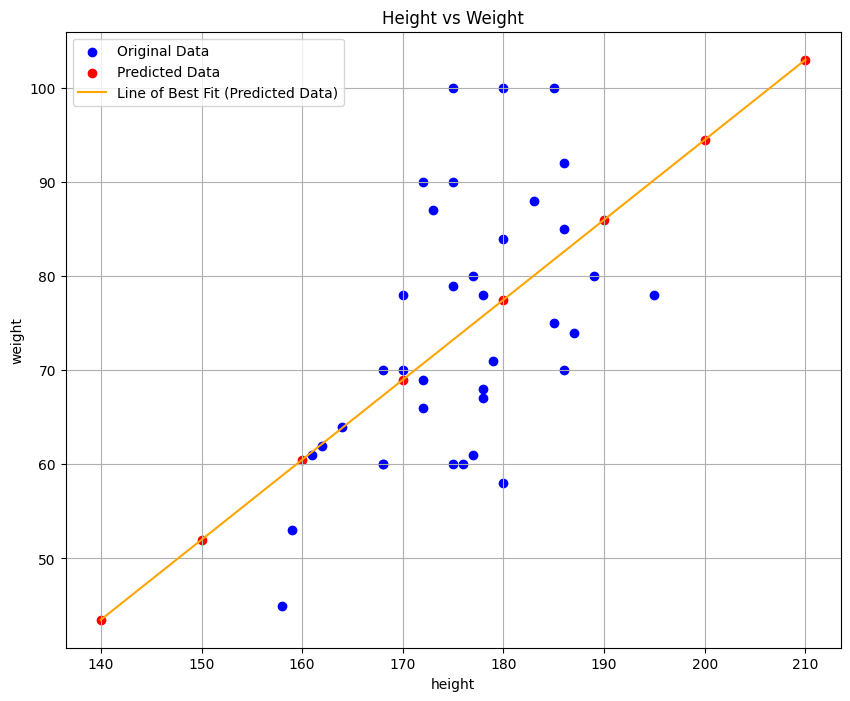

In [54]:
# Plotting the graph of the predicted values and the original data ponts without outliers
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(data_wthout_outliers[:, 0], data_wthout_outliers[:, 1], color='blue')
plt.scatter(h, [pred(data_wthout_outliers, mean_value, cov_matrix, i) for i in h], color='red')
plt.plot(h, [pred(data_wthout_outliers, mean_value, cov_matrix, i) for i in h], color='orange', label='Predicted values')
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Height vs Weight')
plt.legend(['Original Data', 'Predicted Data', 'Line of Best Fit (Predicted Data)'])
plt.show()

We observed that as the height increases, the weight also increases for the predicted values.
Given the daily experience, we think that these results might not be plausible as in natual reality 
because the weight does not increase as the height increases for most of the cases.

To press on the question of whether the 'plausibility' is something that can be easily quantified, 
we can say that it is not easily quantified. Depending upon the graph and the data, it might seem like 
the model can't be plausible in real life scenario.
